# Pandas 3
### Caelan Osman
### Math 403, Section 1
### Tue Sep, 14

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [3]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    #read in data and change the name of the unnmaed column
    data = pd.read_csv('college.csv', delimiter=',')
    data = data.rename(columns = {'Unnamed: 0' : 'College Name'})
    
    #create grouby object
    private_public = data.groupby('Private')
    
    #get description arrays of student/facult ration, top10, and top 25 percent
    student_faculty_max = private_public['S.F.Ratio'].describe().idxmax()['mean']
    student_faculty = private_public['S.F.Ratio'].describe().loc[str(student_faculty_max)].values
    
    top_10_max = private_public['Top10perc'].describe().idxmax()['mean']
    top_10 = private_public['Top10perc'].describe().loc[str(top_10_max)].values
    
    top_25_max = private_public['Top25perc'].describe().idxmax()['mean']
    top_25 = private_public['Top25perc'].describe().loc[str(top_25_max)].values

    return student_faculty, top_10, top_25
prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

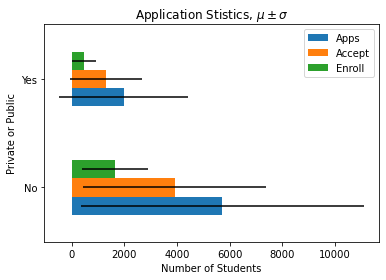

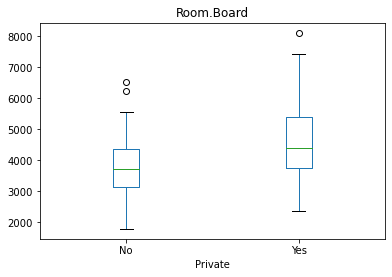

In [4]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    #read in data and change the name of the unnmaed column
    data = pd.read_csv('college.csv', delimiter=',')
    data = data.rename(columns = {'Unnamed: 0' : 'College Name'})
    
    #create grouby object
    private_public = data.groupby('Private')
    
    #visualization to compare num of applicatns, accpeted applicants, and enrolled
    private_public[["Apps", "Accept", "Enroll"]].mean().plot(kind="barh",
        xerr=private_public.std(), title=r"Application Stistics, $\mu\pm\sigma$")
    plt.xlabel("Number of Students")
    plt.ylabel("Private or Public")
    plt.show()
    
    #visualization to compare room and board costs
    data.boxplot(["Room.Board"], by="Private", grid=False)
    plt.suptitle('')
    plt.show()
    
    return
prob2()

# Problem 3

In [5]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    #read in data
    data = pd.read_csv('Ohio_1999.csv', delimiter=',')
    
    #get race/sex combination making the most money in total
    money = data.pivot_table(values='Usual Weekly Earnings', 
                             index=['Race', 'Sex'], aggfunc='sum')
    most_money = money.idxmax()
    
    #get race/sex combination making the most money in total
    hours = data.pivot_table(values='Usual Hours Worked', 
                             index=['Race', 'Sex'], aggfunc='sum')
    most_hours = hours.idxmin()
    
    #get race/sex combination making the most money in total
    avg_hours = data.pivot_table(values='Usual Hours Worked', 
                                 index=['Race', 'Sex'], aggfunc='mean')
    most_avg_hours = avg_hours.idxmax()
    
    return tuple(most_money[0]), tuple(most_hours[0]), tuple(most_avg_hours[0])
    
    
prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [6]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    #read in data
    data = pd.read_csv('Ohio_1999.csv', delimiter=',')
    
    #cut data and get most common degree
    degree = pd.cut(data['Educational Attainment'], [0, 39, 43, 46], right=False)
    most_common_degree = data.pivot_table(values='Educational Attainment', 
                                          index=degree, 
                                          aggfunc='count').idxmax()[0]
    #cut dta and get most common age
    age = pd.qcut(data['Age'], 6)
    most_hours = data.pivot_table(values='Usual Hours Worked', 
                                  index=age).idxmax()[0]
    
    #get age/degree combination for smallest yearly salary.
    smallest_sallary = data.pivot_table(values='Yearly Salary', 
                                        index=[age, degree]).idxmin()[0]
    
    return most_common_degree, most_hours, smallest_sallary

prob4()

(Interval(39, 43, closed='left'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 39, closed='left')))

# Problem 5

In [14]:
def prob5():
    """
    Use pivot tables and groupby objects on the data in
    College.csv to answer the following questions:
        1. Is there a correlation between the percent of alumni
           that donate and the amount the school spends per
           student in both private and public universities?
        2. Is the graduation rate partition with the greatest
           number of schools the same for private and public
           universities?
        3. Is there an inverse correlation between acceptance
           rate and having students from the top 10% of their
           high school class?
        4. Why is the average percentage of students admitted
           from the top 10 percent of their high school class
           so high in private universities with very low
           acceptance rates? Use only the data to explain why; 
           do not extrapolate.
    
    Returns:
        ans_1 (bool): answer to question 1
        ans_2 (bool): answer to question 2
        ans_3 (bool): answer to question 3
        ans_4 (str): answer to question 4
    """
    #read in data and rename unnamed column
    data = pd.read_csv('college.csv', delimiter=',')
    data = data.rename(columns = {'Unnamed: 0' : 'College Name'})
    
    #create grouby object
    private_public = data.groupby('Private')
    #get correlation matrix to understand if the two given data types are correlated
    correlation_mat_expend = private_public[['perc.alumni', 'Expend']].corr()
    ans1 = False

    #partition grad rate and make a pivot table. 
    grad_rate = pd.cut(data['Grad.Rate'], [0, 20, 40, 60, 80, 100])
    college_pivot = data.pivot_table(values='Grad.Rate', 
                                     index=grad_rate, columns='Private', 
                                     aggfunc='count')
    ans2 = False
    
    correlation_mat_acceptance = private_public[['Top10perc', 'Accept']].corr()
    ans3 = True
    
    ans4 = 'Because of the negative correlation found in part 3,\n'
    ans4 += 'it follows that a private university with a low\n'
    ans4 += 'acceptance rate will have a high proportion of students\n' 
    ans4 += 'who were in the top 10% of their high school class.'
    return ans1, ans2, ans3, ans4

print(prob5()[0])
print(prob5()[1])
print(prob5()[2])
print(prob5()[3])


False
False
True
Because of the negative correlation found in part 3,
it follows that a private university with a low
acceptance rate will have a high proportion of students
who were in the top 10% of their high school class.
